#### Imports

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [505]:
pd.set_option('display.max_columns', None)

#### Read dataset

In [506]:
df=pd.read_csv('day.csv')

In [405]:
df.shape

(730, 16)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### No null values 

In [407]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [408]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping Instant because its just an index and it doesnt help us in our investigation.
#### Dropping dteday as we have other depicting months and days of the week,, and we dont need the day for our investigation

In [507]:
#Dropping instant and dteday
df=df.drop(['instant','dteday'],axis=1)

In [597]:
df.head()
#df.groupby('yr')['cnt'].mean()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


#### Mapping the categorical variables for better understanding and categorizing them in common terms for easier handling

In [508]:
# mapping categorical variables 
df['weekday']=df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth']=df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weathersit']=df['weathersit'].map({1:'clear', 2:'mist',3:'drizzle'})


In [412]:
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


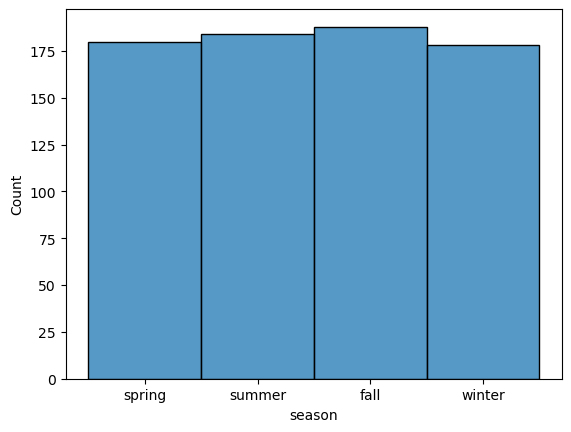

In [510]:
sns.histplot(df.season)
plt.show()

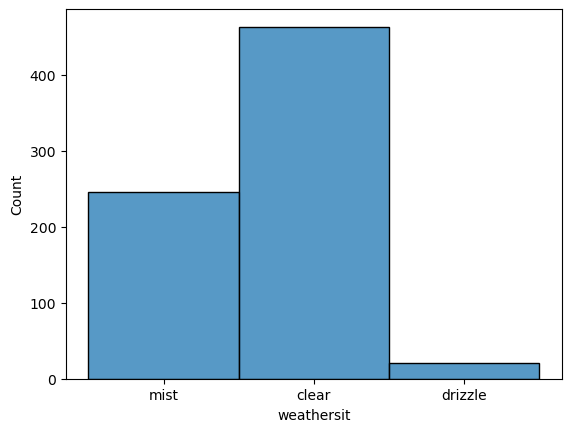

In [511]:
sns.histplot(df.weathersit)
plt.show()

#### It is clear from the above plot that the weather is mostly clear and misty throughout the year
#
#


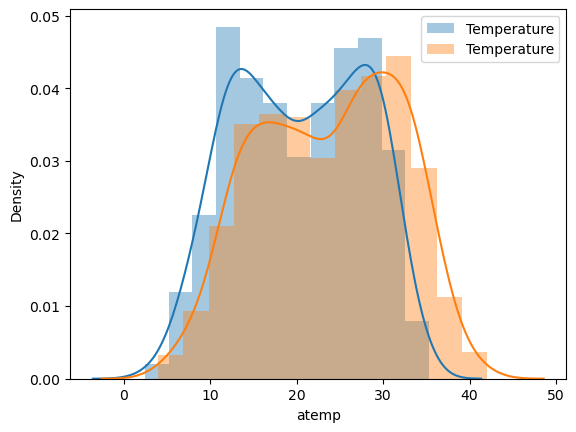

In [512]:
sns.distplot(df.temp, kde=True, label='Temperature')
sns.distplot(df.atemp, kde=True, label='Temperature')
plt.legend()
plt.show()

#### We see deviation between actual and feels like temperature which is due to windspeed and humidity

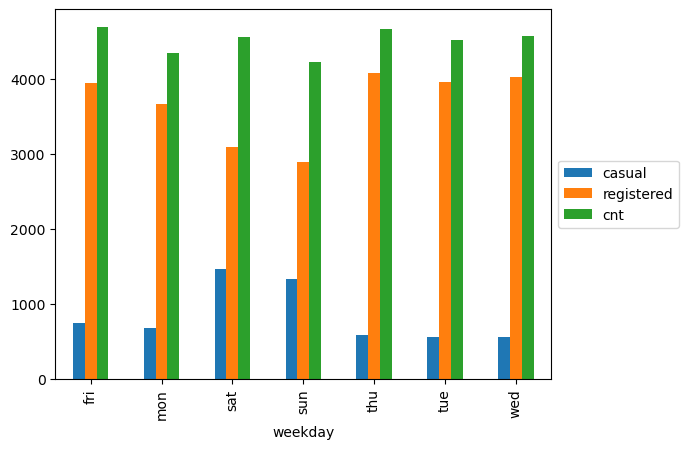

In [513]:
df.groupby('weekday')[['casual', 'registered', 'cnt']].mean().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Higher Casual rides on weekend/holidays compared to Higher Registered rides on weekdays/working days.
#### On Weekdays there are more registered users using bike share to commute to work
#### On weekends Casual rides increase due to people using bikeshare for leisure activities

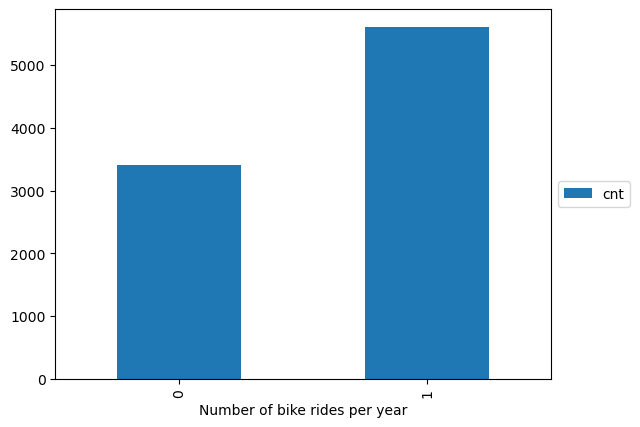

In [598]:
df.groupby('yr')['cnt'].mean().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of bike rides per year')
plt.show()

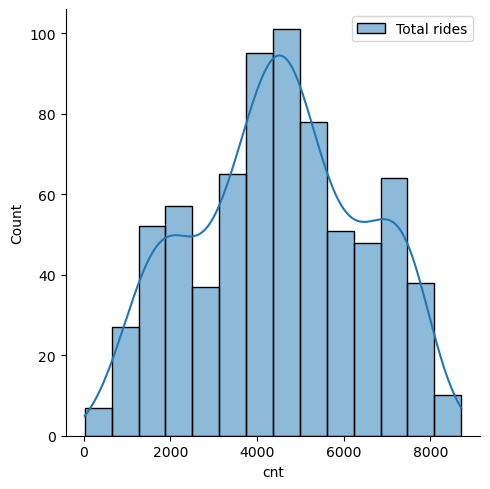

In [515]:
sns.displot(df.cnt, kde=True, label='Total rides')
plt.legend()
plt.show()

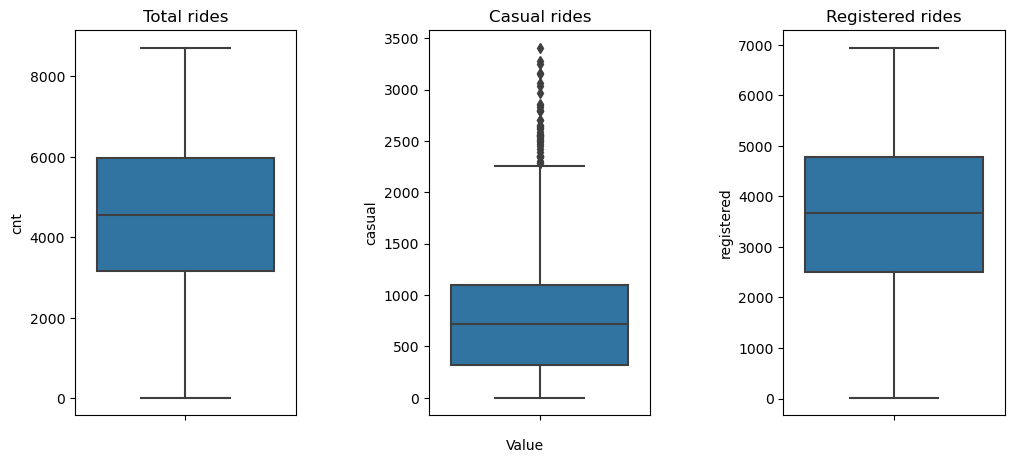

In [516]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Swap x and y axes
sns.boxplot(y=df.cnt, ax=axes[0])
axes[0].set_title('Total rides')

sns.boxplot(y=df.casual, ax=axes[1])
axes[1].set_title('Casual rides')

sns.boxplot(y=df.registered, ax=axes[2])
axes[2].set_title('Registered rides')

# Set common xlabel for all subplots
fig.text(0.5, 0.04, 'Value', ha='center')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Display the boxplots
plt.show()

#### The bike ride numbers closely follow normal distribution with median at around 4800

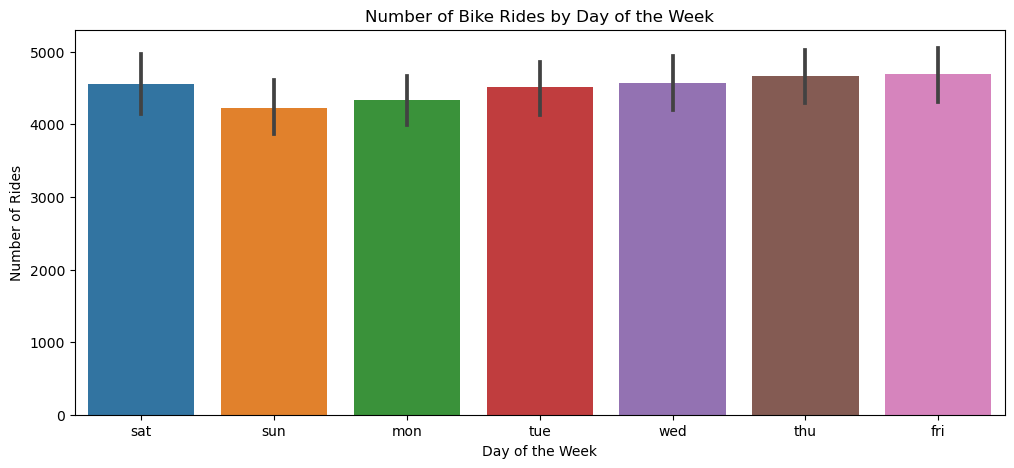

In [517]:
plt.figure(figsize=(12, 5))
sns.barplot(x='weekday', y=df.cnt, data=df)
plt.title('Number of Bike Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

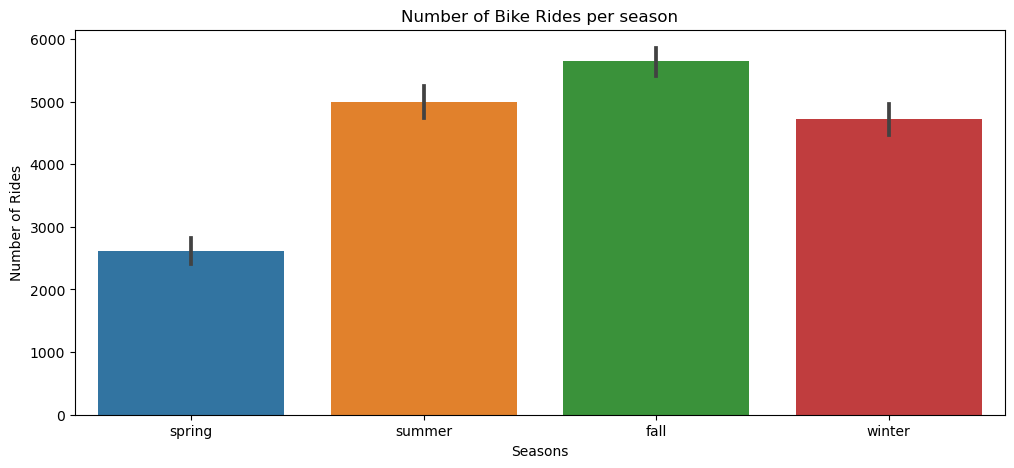

In [518]:
plt.figure(figsize=(12, 5))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Number of Bike Rides per season')
plt.xlabel('Seasons')
plt.ylabel('Number of Rides')
plt.show()

#### Most rides are seen during Fall, followed by Summer and winter but least during Spring

In [602]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.634247,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.481971,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


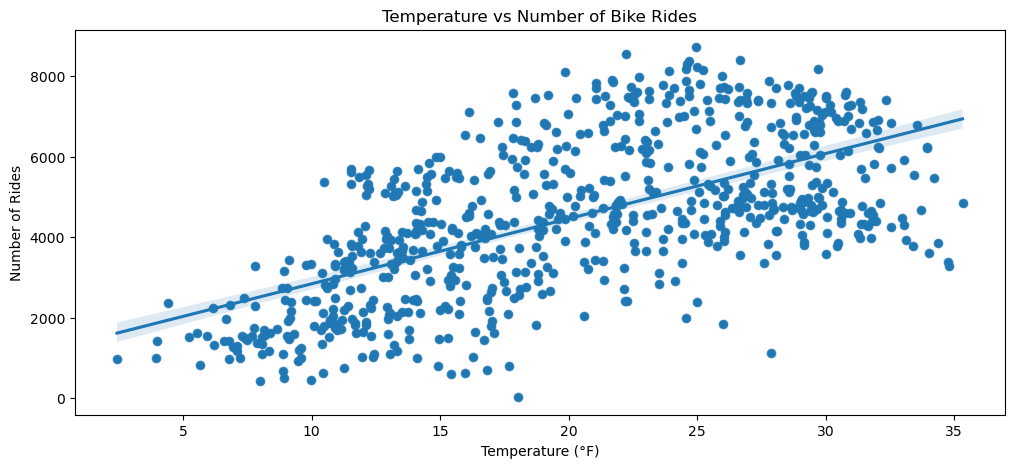

In [520]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='temp', y='cnt', data=df)
reg = sns.regplot(x='temp', y='cnt', data=df)
plt.title('Temperature vs Number of Bike Rides')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Rides')
plt.show()

#### There is a clear positive correlation between temperature and bike rides

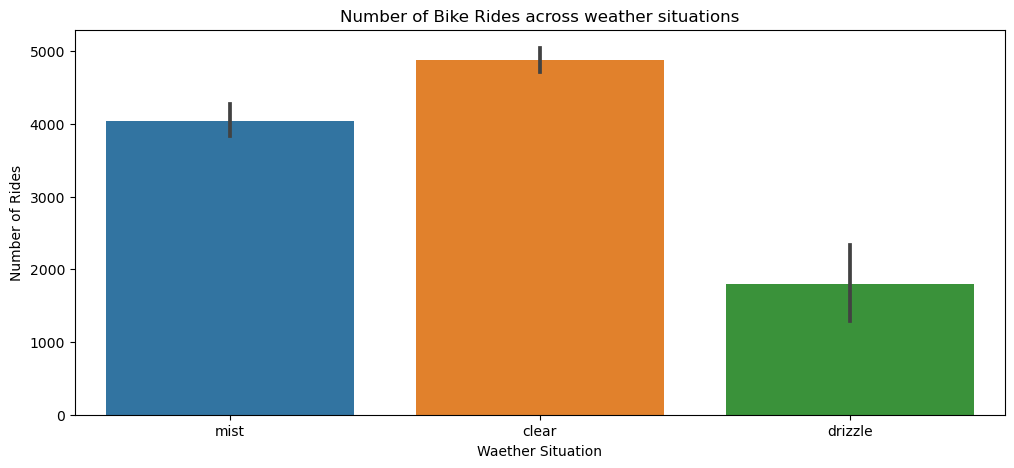

In [522]:
plt.figure(figsize=(12, 5))
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Number of Bike Rides across weather situations')
plt.xlabel('Waether Situation')
plt.ylabel('Number of Rides')
plt.show()

#### There are lesser bike rides during light rainy weather

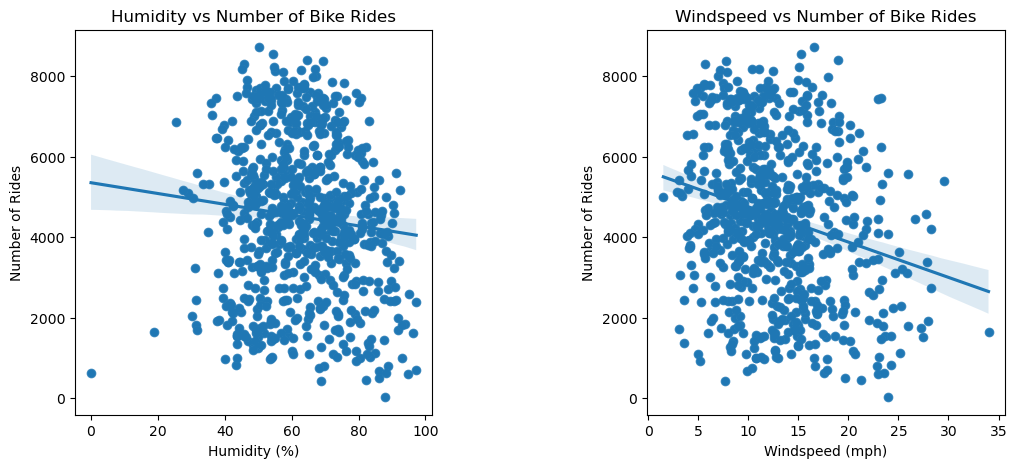

In [523]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create scatter plots of humidity, temperature, and windspeed against cnt
sns.scatterplot(x='hum', y='cnt', data=df, ax=axes[0])
sns.regplot(x='hum', y='cnt', data=df, ax=axes[0])
axes[0].set_title('Humidity vs Number of Bike Rides')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Number of Rides')



sns.scatterplot(x='windspeed', y='cnt', data=df, ax=axes[1])
sns.regplot(x='windspeed', y='cnt', data=df, ax=axes[1])
axes[1].set_title('Windspeed vs Number of Bike Rides')
axes[1].set_xlabel('Windspeed (mph)')
axes[1].set_ylabel('Number of Rides')


plt.subplots_adjust(wspace=0.6)
plt.show()

#### No direct correlation found between humidity and windspeed against Bike rides

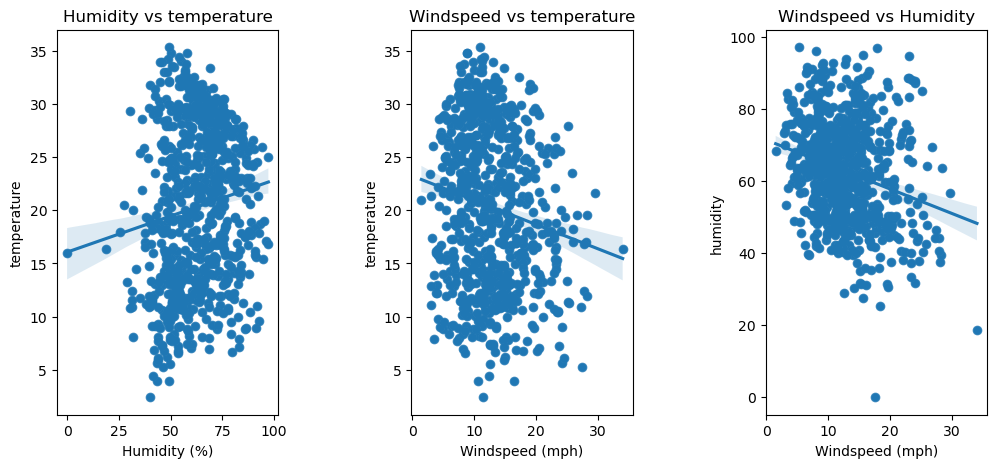

In [524]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Create scatter plots of humidity, temperature, and windspeed against cnt
sns.scatterplot(x='hum', y='temp', data=df, ax=axes[0])
sns.regplot(x='hum', y='temp', data=df, ax=axes[0])
axes[0].set_title('Humidity vs temperature')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('temperature')



sns.scatterplot(x='windspeed', y='temp', data=df, ax=axes[1])
sns.regplot(x='windspeed', y='temp', data=df, ax=axes[1])
axes[1].set_title('Windspeed vs temperature')
axes[1].set_xlabel('Windspeed (mph)')
axes[1].set_ylabel('temperature')


sns.scatterplot(x='windspeed', y='hum', data=df, ax=axes[2])
sns.regplot(x='windspeed', y='hum', data=df, ax=axes[2])
axes[2].set_title('Windspeed vs Humidity')
axes[2].set_xlabel('Windspeed (mph)')
axes[2].set_ylabel('humidity')


plt.subplots_adjust(wspace=0.6)
plt.show()

<Figure size 1600x3200 with 0 Axes>

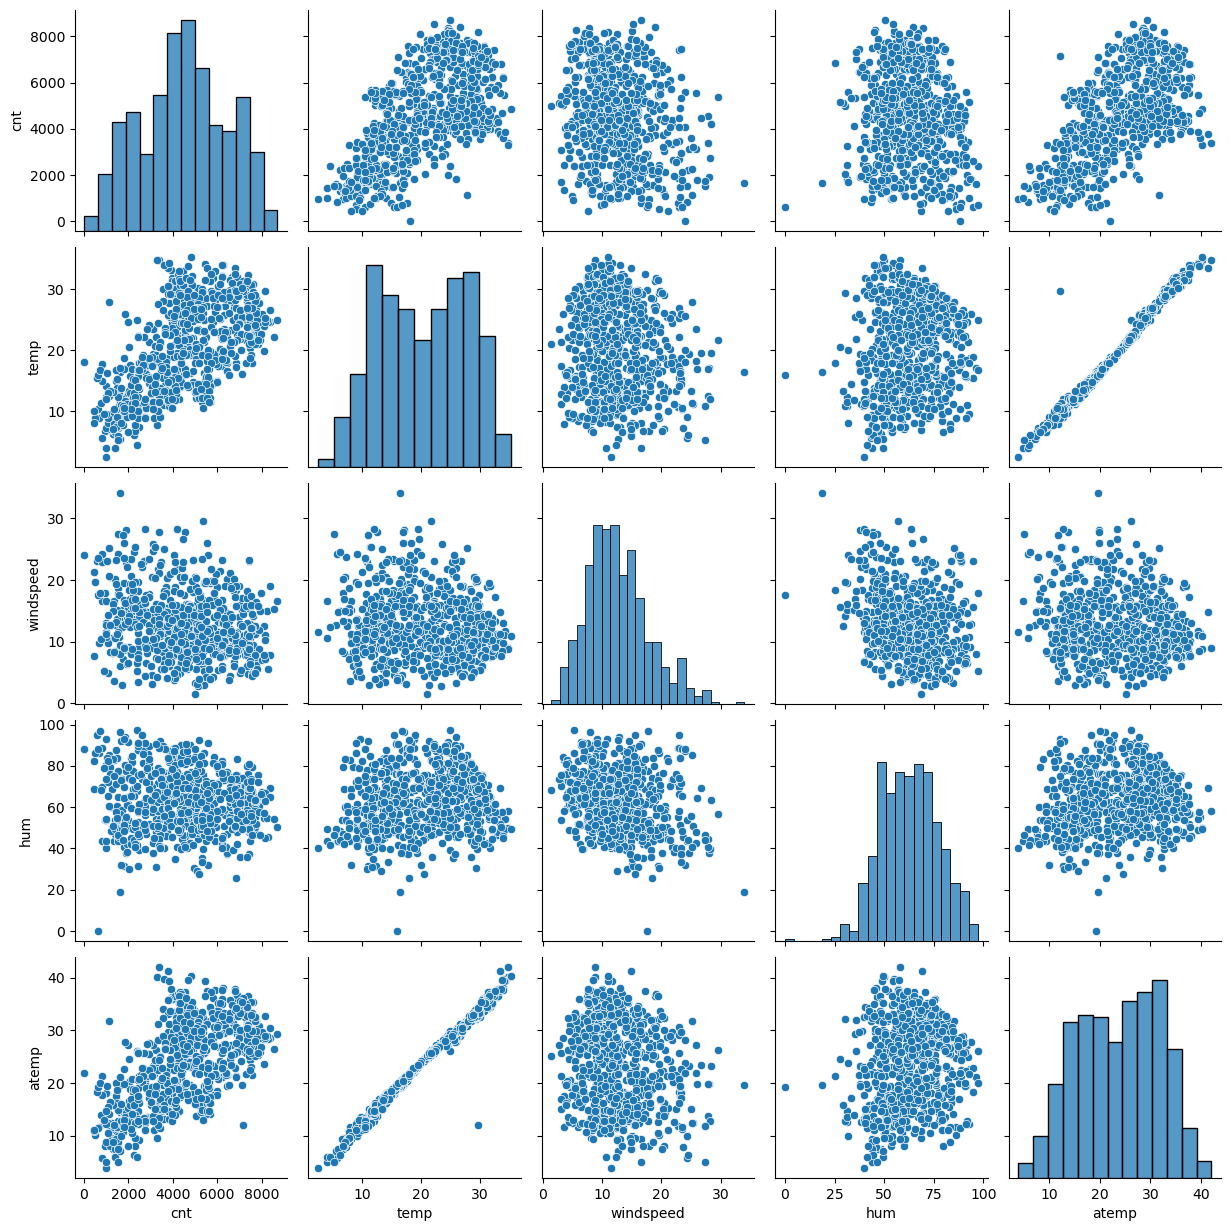

In [604]:
plt.figure(figsize = (16,32))
sns.pairplot(data=df[['cnt','temp','windspeed','hum','atemp']])
plt.show()

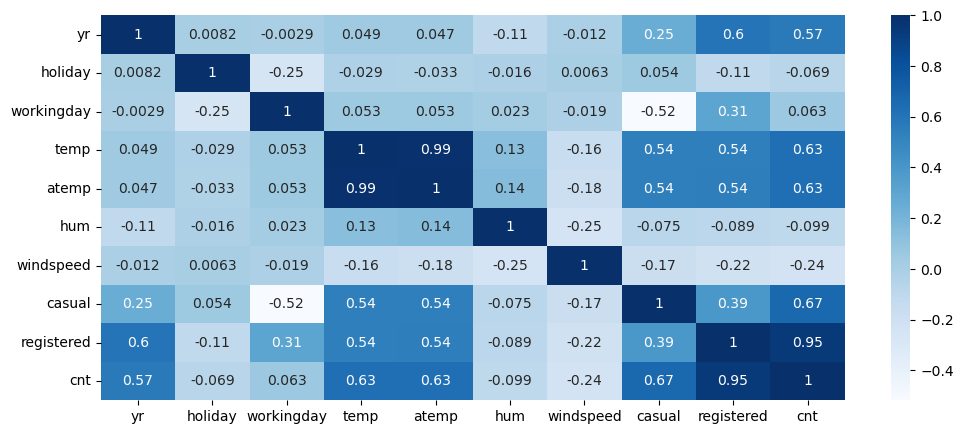

In [529]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

### We see some clear correlation between the target and Predictors variables.
#### 

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


#### We create dummy variables for categorical variables

In [531]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)

In [532]:
df = pd.get_dummies(data=df,columns=["weathersit"])

In [533]:
df= df.drop(['casual','registered'], axis=1)

In [534]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


#### Create Train and Test datasets

In [535]:
# Split into train and test 
df_train, df_test=train_test_split(df,train_size=0.7,random_state=100)

In [536]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [537]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Scaling the train dataset to normalize the continuous variables 

In [538]:
scaler=MinMaxScaler()

In [539]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [540]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating reusable functions for calculation OLS and VIF

In [541]:
#VIF function
def GetVif(train_data):
    vif=pd.DataFrame()
    vif['features']=train_data.columns
    vif['VIF']= [variance_inflation_factor(train_data.values,i)for i in range(train_data.shape[1])]
    vif['VIF']= round(vif.VIF,2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

In [542]:
#OLS function
def LinRegModel(xTrainData,yTrainData):
    X_train_sm=sm.add_constant(xTrainData)
    lr=sm.OLS(yTrainData,X_train_sm)
    lr_model=lr.fit()
    return lr_model.summary()


#### Splitting Train dataset into Target and Predictor | X_train and y_train

In [543]:
#Create X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [544]:
y_train.shape

(510,)

#### Using RFE to check on the features significance and colinearity

In [545]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [546]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 16),
 ('weekday_wed', False, 12),
 ('weathersit_clear', True, 1),
 ('weathersit_drizzle', True, 1),
 ('weathersit_mist', True, 1)]

In [547]:
cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_sat',
       'weekday_sun', 'weathersit_clear', 'weathersit_drizzle',
       'weathersit_mist'],
      dtype='object')

In [548]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [549]:
X_train_rfe=X_train[cols]

#### Checking 1st model 

In [451]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          9.38e-190
Time:                        12:11:12   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1275      0.023      5.611      0.000       0.083       0.172
yr                     0.2308      0.008     28.455      0.000       0.215       0.247
holiday               -0.0370      0.021     -1.761      0.079      -0.078       0.004
workingday             0.0658      0.009      7.311      0.000       0.048       0.083
temp                   0.4776      0.031     15.613      0.000       0.418       0.538
hum                   -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed             -0.1687      0.025     -6.616      0.000      -0.219      -0.119
season_spring         -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_winter          0.0558      0.012      4.528      0.000       0.032       0.080
mnth_Jul              -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_Sep               0.0591      0.015      3.829      0.000       0.029       0.089
weekday_sat            0.0756      0.011      6.808      0.000       0.054       0.097
weekday_sun            0.0231      0.012      1.960      0.051   -5.68e-05       0.046
weathersit_clear       0.1451      0.009     16.126      0.000       0.127       0.163
weathersit_drizzle    -0.1049      0.021     -4.961      0.000      -0.146      -0.063
weathersit_mist        0.0873      0.011      7.953      0.000       0.066       0.109
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     5.09e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [362]:
#X_train_sm=sm.add_constant(X_train_rfe)

In [363]:
# lr=sm.OLS(y_train,X_train_sm)
# lr_model=lr.fit()

In [364]:
# lr_model.summary()

In [550]:
GetVif(X_train_rfe)

,features,VIF
1,holiday,inf
2,workingday,inf
10,weekday_sat,inf
11,weekday_sun,inf
12,weathersit_clear,inf
13,weathersit_drizzle,inf
14,weathersit_mist,inf
3,temp,2.99
6,season_spring,2.55
4,hum,1.89


#### Dropping features to get better significance levels and lesser VIF

In [551]:
X_train_rfe=X_train_rfe.drop('holiday',axis=1)

In [552]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          9.38e-190
Time:                        20:08:06   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0997      0.033      3.048      0.002       0.035       0.164
yr                     0.2308      0.008     28.455      0.000       0.215       0.247
workingday             0.1028      0.026      4.001      0.000       0.052       0.153
temp                   0.4776      0.031     15.613      0.000       0.418       0.538
hum                   -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed             -0.1687      0.025     -6.616      0.000      -0.219      -0.119
season_spring         -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_winter          0.0558      0.012      4.528      0.000       0.032       0.080
mnth_Jul              -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_Sep               0.0591      0.015      3.829      0.000       0.029       0.089
weekday_sat            0.1125      0.027      4.146      0.000       0.059       0.166
weekday_sun            0.0601      0.027      2.203      0.028       0.006       0.114
weathersit_clear       0.1358      0.011     12.305      0.000       0.114       0.158
weathersit_drizzle    -0.1141      0.023     -4.938      0.000      -0.160      -0.069
weathersit_mist        0.0780      0.013      5.862      0.000       0.052       0.104
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     4.45e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [553]:
GetVif(X_train_rfe)

,features,VIF
11,weathersit_clear,62.30
13,weathersit_mist,40.71
1,workingday,9.07
9,weekday_sat,6.06
10,weekday_sun,5.74
12,weathersit_drizzle,5.03
2,temp,2.99
5,season_spring,2.55
3,hum,1.89
6,season_winter,1.78


In [554]:
X_train_rfe=X_train_rfe.drop('weathersit_drizzle',axis=1)

In [555]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          9.38e-190
Time:                        20:08:14   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0144      0.052     -0.276      0.783      -0.117       0.088
yr                   0.2308      0.008     28.455      0.000       0.215       0.247
workingday           0.1028      0.026      4.001      0.000       0.052       0.153
temp                 0.4776      0.031     15.613      0.000       0.418       0.538
hum                 -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed           -0.1687      0.025     -6.616      0.000      -0.219      -0.119
season_spring       -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_winter        0.0558      0.012      4.528      0.000       0.032       0.080
mnth_Jul            -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_Sep             0.0591      0.015      3.829      0.000       0.029       0.089
weekday_sat          0.1125      0.027      4.146      0.000       0.059       0.166
weekday_sun          0.0601      0.027      2.203      0.028       0.006       0.114
weathersit_clear     0.2499      0.026      9.482      0.000       0.198       0.302
weathersit_mist      0.1921      0.025      7.694      0.000       0.143       0.241
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [556]:
GetVif(X_train_rfe)

,features,VIF
3,hum,25.82
1,workingday,20.91
2,temp,18.99
11,weathersit_clear,15.21
12,weathersit_mist,9.23
9,weekday_sat,5.48
10,weekday_sun,5.35
4,windspeed,4.50
5,season_spring,3.08
6,season_winter,2.23


In [557]:
X_train_rfe=X_train_rfe.drop('hum',axis=1)

In [558]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          1.26e-187
Time:                        20:08:21   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1354      0.043     -3.167      0.002      -0.219      -0.051
yr                   0.2344      0.008     28.661      0.000       0.218       0.250
workingday           0.1034      0.026      3.967      0.000       0.052       0.155
temp                 0.4493      0.030     14.895      0.000       0.390       0.509
windspeed           -0.1404      0.025     -5.657      0.000      -0.189      -0.092
season_spring       -0.1118      0.015     -7.441      0.000      -0.141      -0.082
season_winter        0.0468      0.012      3.808      0.000       0.023       0.071
mnth_Jul            -0.0711      0.017     -4.120      0.000      -0.105      -0.037
mnth_Sep             0.0559      0.016      3.573      0.000       0.025       0.087
weekday_sat          0.1148      0.028      4.171      0.000       0.061       0.169
weekday_sun          0.0578      0.028      2.089      0.037       0.003       0.112
weathersit_clear     0.2907      0.025     11.824      0.000       0.242       0.339
weathersit_mist      0.2091      0.025      8.381      0.000       0.160       0.258
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.995
Skew:                          -0.644   Prob(JB):                     4.04e-36
Kurtosis:                       5.452   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [559]:
GetVif(X_train_rfe)

,features,VIF
1,workingday,17.27
10,weathersit_clear,15.21
2,temp,14.88
11,weathersit_mist,8.71
8,weekday_sat,4.71
9,weekday_sun,4.51
3,windspeed,4.48
4,season_spring,2.79
0,yr,2.07
5,season_winter,1.85


In [560]:
X_train_rfe=X_train_rfe.drop('windspeed',axis=1)

In [561]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          4.25e-182
Time:                        20:08:30   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     498   BIC:                            -899.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2101      0.042     -5.013      0.000      -0.292      -0.128
yr                   0.2333      0.008     27.682      0.000       0.217       0.250
workingday           0.1066      0.027      3.969      0.000       0.054       0.159
temp                 0.4689      0.031     15.183      0.000       0.408       0.530
season_spring       -0.1116      0.015     -7.210      0.000      -0.142      -0.081
season_winter        0.0554      0.013      4.412      0.000       0.031       0.080
mnth_Jul            -0.0670      0.018     -3.771      0.000      -0.102      -0.032
mnth_Sep             0.0641      0.016      3.989      0.000       0.033       0.096
weekday_sat          0.1150      0.028      4.053      0.000       0.059       0.171
weekday_sun          0.0603      0.029      2.114      0.035       0.004       0.116
weathersit_clear     0.3046      0.025     12.081      0.000       0.255       0.354
weathersit_mist      0.2245      0.026      8.783      0.000       0.174       0.275
==============================================================================
Omnibus:                       72.585   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.825
Skew:                          -0.684   Prob(JB):                     1.23e-45
Kurtosis:                       5.803   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [562]:
GetVif(X_train_rfe)

,features,VIF
1,workingday,16.37
9,weathersit_clear,15.04
2,temp,14.86
10,weathersit_mist,8.64
7,weekday_sat,4.45
8,weekday_sun,4.32
3,season_spring,2.73
0,yr,2.07
4,season_winter,1.85
5,mnth_Jul,1.37


In [563]:
X_train_rfe=X_train_rfe.drop('workingday',axis=1)

In [564]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.6
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          6.18e-180
Time:                        20:08:41   Log-Likelihood:                 479.20
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     499   BIC:                            -889.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1028      0.033     -3.163      0.002      -0.167      -0.039
yr                   0.2338      0.009     27.341      0.000       0.217       0.251
temp                 0.4702      0.031     15.006      0.000       0.409       0.532
season_spring       -0.1147      0.016     -7.310      0.000      -0.146      -0.084
season_winter        0.0522      0.013      4.102      0.000       0.027       0.077
mnth_Jul            -0.0662      0.018     -3.676      0.000      -0.102      -0.031
mnth_Sep             0.0603      0.016      3.706      0.000       0.028       0.092
weekday_sat          0.0125      0.012      1.047      0.296      -0.011       0.036
weekday_sun         -0.0421      0.012     -3.415      0.001      -0.066      -0.018
weathersit_clear     0.3000      0.026     11.738      0.000       0.250       0.350
weathersit_mist      0.2219      0.026      8.558      0.000       0.171       0.273
==============================================================================
Omnibus:                       80.630   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.594
Skew:                          -0.766   Prob(JB):                     1.03e-49
Kurtosis:                       5.875   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [565]:
GetVif(X_train_rfe)

,features,VIF
1,temp,11.99
8,weathersit_clear,10.76
9,weathersit_mist,5.98
2,season_spring,2.44
0,yr,2.07
3,season_winter,1.69
4,mnth_Jul,1.37
6,weekday_sat,1.22
7,weekday_sun,1.21
5,mnth_Sep,1.19


In [566]:
X_train_rfe=X_train_rfe.drop('weekday_sat',axis=1)

In [567]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.1
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          6.47e-181
Time:                        20:08:47   Log-Likelihood:                 478.64
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     500   BIC:                            -894.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0998      0.032     -3.082      0.002      -0.163      -0.036
yr                   0.2335      0.009     27.320      0.000       0.217       0.250
temp                 0.4693      0.031     14.981      0.000       0.408       0.531
season_spring       -0.1146      0.016     -7.306      0.000      -0.145      -0.084
season_winter        0.0524      0.013      4.118      0.000       0.027       0.077
mnth_Jul            -0.0658      0.018     -3.650      0.000      -0.101      -0.030
mnth_Sep             0.0603      0.016      3.705      0.000       0.028       0.092
weekday_sun         -0.0444      0.012     -3.657      0.000      -0.068      -0.021
weathersit_clear     0.2997      0.026     11.727      0.000       0.250       0.350
weathersit_mist      0.2217      0.026      8.547      0.000       0.171       0.273
==============================================================================
Omnibus:                       75.956   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.146
Skew:                          -0.715   Prob(JB):                     7.04e-48
Kurtosis:                       5.859   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [568]:
GetVif(X_train_rfe)

,features,VIF
1,temp,11.98
7,weathersit_clear,10.69
8,weathersit_mist,5.94
2,season_spring,2.43
0,yr,2.07
3,season_winter,1.69
4,mnth_Jul,1.37
5,mnth_Sep,1.19
6,weekday_sun,1.18


In [569]:
X_train_rfe=X_train_rfe.drop('season_spring',axis=1)

In [570]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     254.8
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          3.73e-171
Time:                        20:08:58   Log-Likelihood:                 452.77
No. Observations:                 510   AIC:                            -887.5
Df Residuals:                     501   BIC:                            -849.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2234      0.029     -7.700      0.000      -0.280      -0.166
yr                   0.2307      0.009     25.704      0.000       0.213       0.248
temp                 0.6326      0.023     27.443      0.000       0.587       0.678
season_winter        0.1079      0.011     10.066      0.000       0.087       0.129
mnth_Jul            -0.0769      0.019     -4.079      0.000      -0.114      -0.040
mnth_Sep             0.0628      0.017      3.674      0.000       0.029       0.096
weekday_sun         -0.0450      0.013     -3.526      0.000      -0.070      -0.020
weathersit_clear     0.2947      0.027     10.973      0.000       0.242       0.347
weathersit_mist      0.2205      0.027      8.090      0.000       0.167       0.274
==============================================================================
Omnibus:                       46.760   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.407
Skew:                          -0.543   Prob(JB):                     5.21e-21
Kurtosis:                       4.793   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [571]:
GetVif(X_train_rfe)

,features,VIF
1,temp,7.84
6,weathersit_clear,5.47
7,weathersit_mist,3.22
0,yr,2.06
3,mnth_Jul,1.36
2,season_winter,1.33
4,mnth_Sep,1.19
5,weekday_sun,1.18


In [572]:
X_train_rfe=X_train_rfe.drop('weathersit_mist',axis=1)

In [573]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     249.8
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          4.70e-159
Time:                        20:09:08   Log-Likelihood:                 421.47
No. Observations:                 510   AIC:                            -826.9
Df Residuals:                     502   BIC:                            -793.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0199      0.015     -1.298      0.195      -0.050       0.010
yr                   0.2344      0.010     24.628      0.000       0.216       0.253
temp                 0.6341      0.024     25.892      0.000       0.586       0.682
season_winter        0.0987      0.011      8.713      0.000       0.076       0.121
mnth_Jul            -0.0831      0.020     -4.152      0.000      -0.122      -0.044
mnth_Sep             0.0589      0.018      3.244      0.001       0.023       0.095
weekday_sun         -0.0419      0.014     -3.092      0.002      -0.069      -0.015
weathersit_clear     0.0909      0.010      9.188      0.000       0.071       0.110
==============================================================================
Omnibus:                       83.831   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.432
Skew:                          -0.804   Prob(JB):                     1.51e-50
Kurtosis:                       5.866   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [574]:
GetVif(X_train_rfe)

,features,VIF
1,temp,3.79
6,weathersit_clear,2.43
0,yr,1.96
3,mnth_Jul,1.29
2,season_winter,1.24
4,mnth_Sep,1.18
5,weekday_sun,1.16


#### Adding features back to improve accuracy

In [575]:
X_train_rfe['season_spring']=X_train['season_spring']

In [576]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     243.9
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          2.30e-167
Time:                        20:09:50   Log-Likelihood:                 443.87
No. Observations:                 510   AIC:                            -869.7
Df Residuals:                     501   BIC:                            -831.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1039      0.023      4.430      0.000       0.058       0.150
yr                   0.2373      0.009     25.993      0.000       0.219       0.255
temp                 0.4719      0.033     14.085      0.000       0.406       0.538
season_winter        0.0435      0.014      3.206      0.001       0.017       0.070
mnth_Jul            -0.0721      0.019     -3.743      0.000      -0.110      -0.034
mnth_Sep             0.0563      0.017      3.239      0.001       0.022       0.091
weekday_sun         -0.0413      0.013     -3.182      0.002      -0.067      -0.016
weathersit_clear     0.0949      0.009      9.991      0.000       0.076       0.114
season_spring       -0.1138      0.017     -6.782      0.000      -0.147      -0.081
==============================================================================
Omnibus:                      114.817   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.737
Skew:                          -0.974   Prob(JB):                     1.97e-96
Kurtosis:                       7.116   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [577]:
GetVif(X_train_rfe)

,features,VIF
1,temp,3.81
6,weathersit_clear,2.68
0,yr,2.04
3,mnth_Jul,1.32
7,season_spring,1.32
2,season_winter,1.30
4,mnth_Sep,1.18
5,weekday_sun,1.17


In [578]:
X_train_rfe['weathersit_drizzle']=X_train['weathersit_drizzle']

In [579]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.1
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          6.47e-181
Time:                        20:09:59   Log-Likelihood:                 478.64
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     500   BIC:                            -894.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1219      0.022      5.532      0.000       0.079       0.165
yr                     0.2335      0.009     27.320      0.000       0.217       0.250
temp                   0.4693      0.031     14.981      0.000       0.408       0.531
season_winter          0.0524      0.013      4.118      0.000       0.027       0.077
mnth_Jul              -0.0658      0.018     -3.650      0.000      -0.101      -0.030
mnth_Sep               0.0603      0.016      3.705      0.000       0.028       0.092
weekday_sun           -0.0444      0.012     -3.657      0.000      -0.068      -0.021
weathersit_clear       0.0781      0.009      8.586      0.000       0.060       0.096
season_spring         -0.1146      0.016     -7.306      0.000      -0.145      -0.084
weathersit_drizzle    -0.2217      0.026     -8.547      0.000      -0.273      -0.171
==============================================================================
Omnibus:                       75.956   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.146
Skew:                          -0.715   Prob(JB):                     7.04e-48
Kurtosis:                       5.859   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [580]:
GetVif(X_train_rfe)

,features,VIF
1,temp,3.92
6,weathersit_clear,2.79
0,yr,2.05
2,season_winter,1.35
7,season_spring,1.33
3,mnth_Jul,1.32
4,mnth_Sep,1.19
5,weekday_sun,1.17
8,weathersit_drizzle,1.09


### Added columns dropped in previous steps 1 at a time to see effects on RSquare, PValue, VIF and coefficients, and came to the final model of the columns ['yr', 'temp', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_sun','weathersit_clear', 'season_spring', 'weathersit_drizzle'] for a proper fit with Rsquare of 80+ , Significant Pvalues, and VIF in acceptable range 

In [581]:
X_train_rfe.columns

Index(['yr', 'temp', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_sun',
       'weathersit_clear', 'season_spring', 'weathersit_drizzle'],
      dtype='object')

## Final Model

In [394]:
# X_train_rfe['weathersit_drizzle']=X_train['weathersit_drizzle']

In [582]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.1
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          6.47e-181
Time:                        20:10:21   Log-Likelihood:                 478.64
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     500   BIC:                            -894.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1219      0.022      5.532      0.000       0.079       0.165
yr                     0.2335      0.009     27.320      0.000       0.217       0.250
temp                   0.4693      0.031     14.981      0.000       0.408       0.531
season_winter          0.0524      0.013      4.118      0.000       0.027       0.077
mnth_Jul              -0.0658      0.018     -3.650      0.000      -0.101      -0.030
mnth_Sep               0.0603      0.016      3.705      0.000       0.028       0.092
weekday_sun           -0.0444      0.012     -3.657      0.000      -0.068      -0.021
weathersit_clear       0.0781      0.009      8.586      0.000       0.060       0.096
season_spring         -0.1146      0.016     -7.306      0.000      -0.145      -0.084
weathersit_drizzle    -0.2217      0.026     -8.547      0.000      -0.273      -0.171
==============================================================================
Omnibus:                       75.956   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.146
Skew:                          -0.715   Prob(JB):                     7.04e-48
Kurtosis:                       5.859   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [583]:
GetVif(X_train_rfe)

,features,VIF
1,temp,3.92
6,weathersit_clear,2.79
0,yr,2.05
2,season_winter,1.35
7,season_spring,1.33
3,mnth_Jul,1.32
4,mnth_Sep,1.19
5,weekday_sun,1.17
8,weathersit_drizzle,1.09


### Residual

In [584]:
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [585]:
y_train_pred=lr_model.predict(X_train_sm)

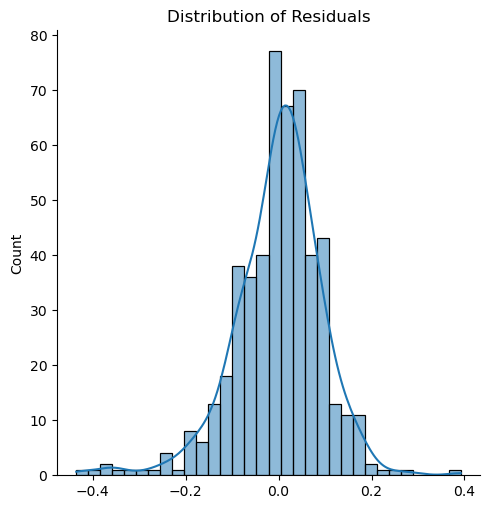

In [586]:
res=y_train-y_train_pred
sns.displot(res,kde=True)
plt.title('Distribution of Residuals')
plt.show()

#### Plotting a QQ Plot for Train Dataset

In [606]:
from statsmodels.api import qqplot

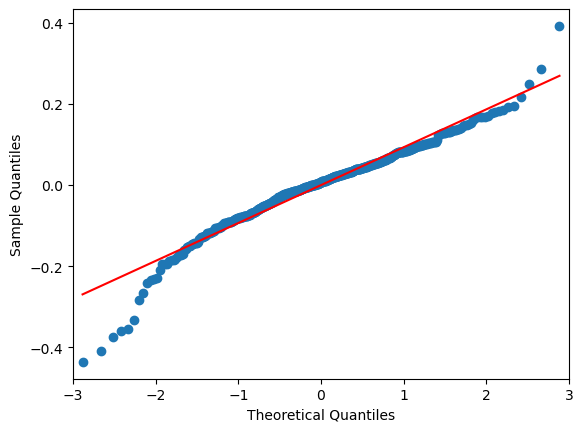

In [611]:
sm.qqplot(res, line='r')
plt.show()

### Predict model on Test Dataset

In [587]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [588]:
y_test=df_test.pop('cnt')
X_test=df_test

In [589]:
cols_test=X_train_rfe.columns

In [590]:
X_test_sm=X_test[cols_test]
X_test_sm= sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,temp,season_winter,mnth_Jul,mnth_Sep,weekday_sun,weathersit_clear,season_spring,weathersit_drizzle
184,1.0,0,0.831783,0,1,0,0,0,0,0
535,1.0,1,0.901354,0,0,0,0,1,0,0
299,1.0,0,0.511964,1,0,0,0,0,0,0
221,1.0,0,0.881625,0,0,0,0,1,0,0
152,1.0,0,0.817246,0,0,0,0,1,0,0


In [498]:
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred

184    0.446429
535    0.856429
299    0.414493
221    0.613664
152    0.583453
         ...   
702    0.729495
127    0.429894
640    0.757637
72     0.240892
653    0.725110
Length: 220, dtype: float64

#### QQ Plot for Test Dataset

In [612]:
res_test= y_test-y_test_pred

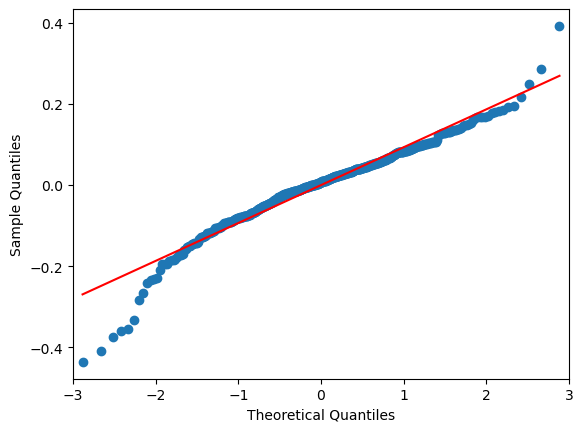

In [613]:
sm.qqplot(res, line='r')
plt.show()

## Calculating R2 Score 

In [499]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)

## R2 score of Test Dataset is 0.811 and R2 Score of Train Dataset is 0.822. We can clearly say that the model is Accurate

In [591]:
print('R-Square Score of Test Dataset is '+ str(r2))

R-Square Score of Test Dataset is 0.8113861413387276
